In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df.Id.nunique()

150

In [6]:
df.Species.nunique()

3

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns 

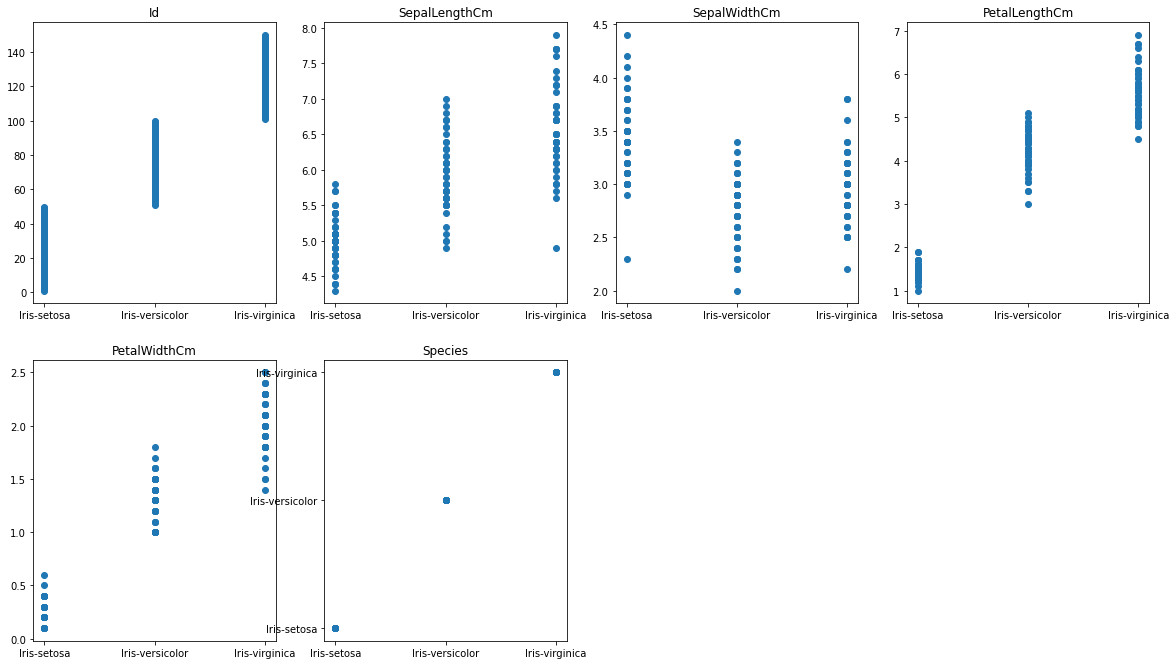

In [9]:
plt.figure(figsize=(20,30))
i=1
for variable in df:
    plt.subplot(5,4,i)
    plt.scatter(df["Species"], df[variable])
    plt.title(variable)
    i=i+1
                

c:\users\ayush agarwal\envs\test\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


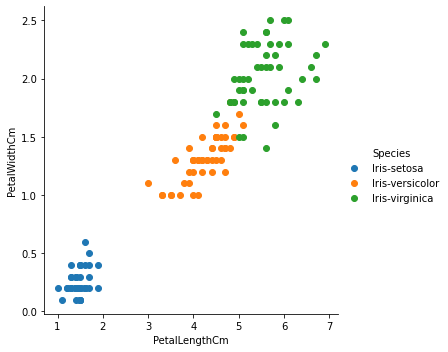

In [10]:
sns.FacetGrid(df, hue="Species", size=5) \
   .map(plt.scatter, "PetalLengthCm", "PetalWidthCm") \
   .add_legend()

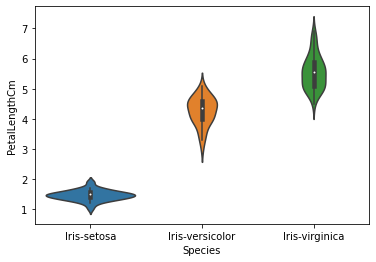

In [11]:
sns.violinplot(x="Species", y="PetalLengthCm", data=df, size=6)

In [12]:
repl={"Species":{"Iris-versicolor":"Iris-virginica"}}
df.replace(repl, inplace=True)

In [13]:
df.Species.nunique()

2

In [14]:
df.Species.unique()

array(['Iris-setosa', 'Iris-virginica'], dtype=object)

In [15]:
from sklearn.model_selection import train_test_split
X=df[["PetalLengthCm", "PetalWidthCm"]]
y=df["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [16]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:

predictions= svclassifier.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

[[11  0]
 [ 0 19]]
                precision    recall  f1-score   support

   Iris-setosa       1.00      1.00      1.00        11
Iris-virginica       1.00      1.00      1.00        19

      accuracy                           1.00        30
     macro avg       1.00      1.00      1.00        30
  weighted avg       1.00      1.00      1.00        30



In [19]:
from sklearn.tree import DecisionTreeClassifier 

In [20]:
d = DecisionTreeClassifier()
d = d.fit(X_train,y_train)
y_pred = d.predict(X_test)

In [21]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0
